In [1]:
import pandas as pd
import numpy as np
import nltk
from collections import Counter
from nltk.corpus import stopwords
from sklearn.metrics import log_loss
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from scipy.optimize import minimize
stops = set(stopwords.words("english"))
import xgboost as xgb
from sklearn.cross_validation import train_test_split
import multiprocessing
import difflib

import matplotlib.pyplot as plt
import seaborn as sns

/home/takaya/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('../data/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [9]:
def gao(a, b):
    return model.wmdistance(a.lower().split(), b.lower().split())

In [24]:
gao('intensley stop dream', 'dream speak')

1.6095963661603927

In [23]:
%matplotlib inline

plt.rcParams['figure.figsize'] = (20.0, 12.0)
pd.set_option("display.max_colwidth", -1)
pd.set_option("display.max_rows", 101)

In [3]:
def read_data(t, features):
    data = pd.read_csv('../input/{}.csv'.format(t))
    for feature in features:
        data = pd.merge(data, pd.read_pickle('../feature/{}_{}.pkl'.format(t, feature)))
    data.fillna(0.0)
    return data

In [4]:
features = [
    'sum_prob_weight_common_words'
]

In [5]:
train = read_data('train', features)

In [20]:
np.average(train.sum_prob_weight_common_words)

2.7484455413917388

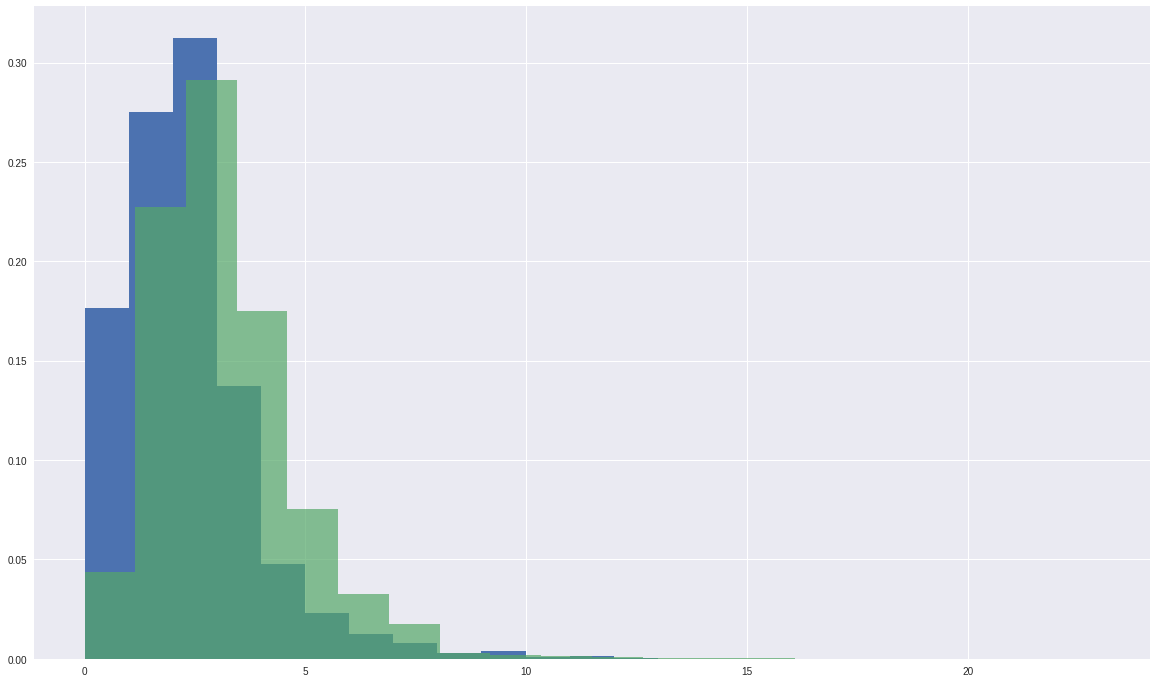

In [26]:
plt.hist(train.sum_prob_weight_common_words[train['is_duplicate'] == 0], bins=20, normed=True, label='0')
plt.hist(train.sum_prob_weight_common_words[train['is_duplicate'] == 1], bins=20, normed=True, label='1', alpha=0.7)
None